ref:https://navoshta.com/traffic-signs-classification/

# Traffic Sign Classification with Keras

you're going to use the German Traffic Sign Recognition Benchmark dataset that you've used previously.  
You can download pickle files with sanitized traffic sign data here:

In [1]:
from urllib.request import urlretrieve
from os.path import isfile
from tqdm import tqdm

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('traffic-signs-data/train.p'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='Train Dataset') as pbar:
        urlretrieve(
            'https://s3.amazonaws.com/udacity-sdc/datasets/german_traffic_sign_benchmark/train.p',
            'train.p',
            pbar.hook)

if not isfile('traffic-signs-data/test.p'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='Test Dataset') as pbar:
        urlretrieve(
            'https://s3.amazonaws.com/udacity-sdc/datasets/german_traffic_sign_benchmark/test.p',
            'test.p',
            pbar.hook)

print('Training and Test data downloaded.')

Training and Test data downloaded.


In [2]:
import pickle
import numpy as np
import math
import matplotlib
from matplotlib import pyplot
%matplotlib inline


# Fix error with TF and Keras
import tensorflow as tf
#tf.python.control_flow_ops = tf
tf.control_flow_ops = tf

print('Modules loaded.')

Modules loaded.


## Load data

In [3]:
import pickle

def load_pickled_data(file, columns):
    """
    Loads pickled training and test data.
    
    Parameters
    ----------
    file    : 
              Name of the pickle file.
    columns : list of strings
              List of columns in pickled data we're interested in.

    Returns
    -------
    A tuple of datasets for given columns.    
    """

    with open(file, mode='rb') as f:
        dataset = pickle.load(f)
    return tuple(map(lambda c: dataset[c], columns))

In [5]:
from pandas.io.parsers import read_csv

signnames = read_csv("signnames.csv").values[:, 1]
train_dataset_file = "traffic-signs-data/train.p"
test_dataset_file = "traffic-signs-data/test.p"
train_balanced_dataset_file = "traffic-signs-data/train_balanced.p"

X_train, y_train = load_pickled_data(train_dataset_file, ['features', 'labels'])
X_test, y_test = load_pickled_data(test_dataset_file, ['features', 'labels'])

n_train = y_train.shape[0]
n_test = y_test.shape[0]
image_shape = X_train[0].shape
image_size = image_shape[0]
sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)
n_classes = class_counts.shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


数据集未被打乱
* `sign_class`: 表示类别
* `class_indices`: 表示该类第一次出现的index位置
* `signnames`: 类别名称

In [26]:
print("sign_classes: \n",sign_classes)
print("------"*10)
print("class_indices: \n",class_indices)
print("------"*10)
print("signnames: \n",signnames)

sign_classes: 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
------------------------------------------------------------
class_indices: 
 [    0   210  2430  4680  6090  8070  9930 10350 11790 13200 14670 16680
 18000 20100 22260 23040 23670 24090 25200 26400 26610 26970 27300 27690
 28200 28470 29970 30570 30810 31350 31620 32070 32850 33090 33779 34199
 35399 35789 35999 38069 38369 38729 38969]
------------------------------------------------------------
signnames: 
 ['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Speed limit (60km/h)' 'Speed limit (70km/h)' 'Speed limit (80km/h)'
 'End of speed limit (80km/h)' 'Speed limit (100km/h)'
 'Speed limit (120km/h)' 'No passing'
 'No passing for vechiles over 3.5 metric tons'
 'Right-of-way at the next intersection' 'Priority road' 'Yield' 'Stop'
 'No vechiles' 'Vechiles over 3.5 metric tons prohibited' 'No entry'
 'General cauti

随机从各类交通牌图片中抽取10张展示；
交通牌的分布图。

Class 0: Speed limit (20km/h)                                210 samples


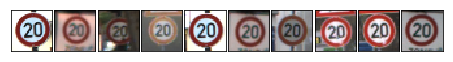

--------------------------------------------------------------------------------------

Class 1: Speed limit (30km/h)                                2220 samples


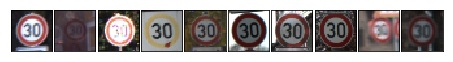

--------------------------------------------------------------------------------------

Class 2: Speed limit (50km/h)                                2250 samples


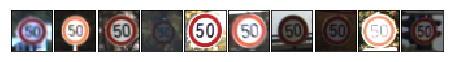

--------------------------------------------------------------------------------------

Class 3: Speed limit (60km/h)                                1410 samples


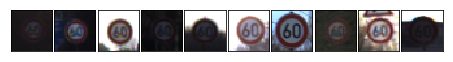

--------------------------------------------------------------------------------------

Class 4: Speed limit (70km/h)                                1980 samples


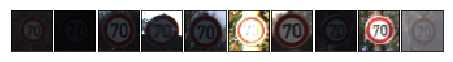

--------------------------------------------------------------------------------------

Class 5: Speed limit (80km/h)                                1860 samples


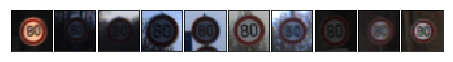

--------------------------------------------------------------------------------------

Class 6: End of speed limit (80km/h)                         420 samples


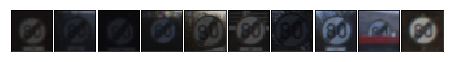

--------------------------------------------------------------------------------------

Class 7: Speed limit (100km/h)                               1440 samples


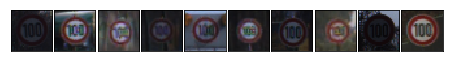

--------------------------------------------------------------------------------------

Class 8: Speed limit (120km/h)                               1410 samples


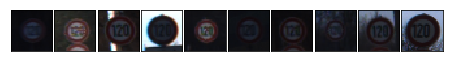

--------------------------------------------------------------------------------------

Class 9: No passing                                          1470 samples


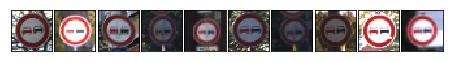

--------------------------------------------------------------------------------------

Class 10: No passing for vechiles over 3.5 metric tons        2010 samples


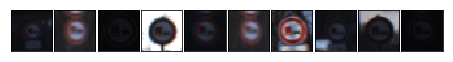

--------------------------------------------------------------------------------------

Class 11: Right-of-way at the next intersection               1320 samples


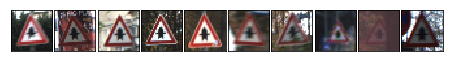

--------------------------------------------------------------------------------------

Class 12: Priority road                                       2100 samples


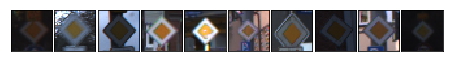

--------------------------------------------------------------------------------------

Class 13: Yield                                               2160 samples


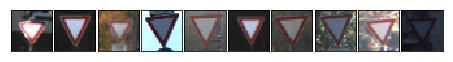

--------------------------------------------------------------------------------------

Class 14: Stop                                                780 samples


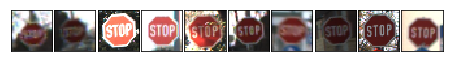

--------------------------------------------------------------------------------------

Class 15: No vechiles                                         630 samples


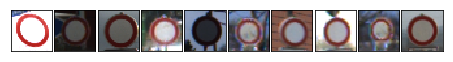

--------------------------------------------------------------------------------------

Class 16: Vechiles over 3.5 metric tons prohibited            420 samples


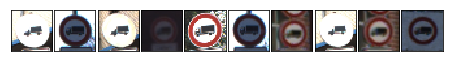

--------------------------------------------------------------------------------------

Class 17: No entry                                            1110 samples


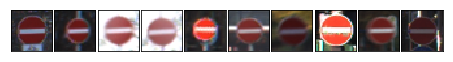

--------------------------------------------------------------------------------------

Class 18: General caution                                     1200 samples


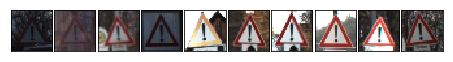

--------------------------------------------------------------------------------------

Class 19: Dangerous curve to the left                         210 samples


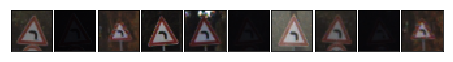

--------------------------------------------------------------------------------------

Class 20: Dangerous curve to the right                        360 samples


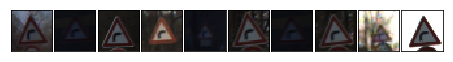

--------------------------------------------------------------------------------------

Class 21: Double curve                                        330 samples


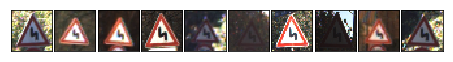

--------------------------------------------------------------------------------------

Class 22: Bumpy road                                          390 samples


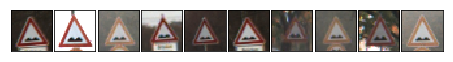

--------------------------------------------------------------------------------------

Class 23: Slippery road                                       510 samples


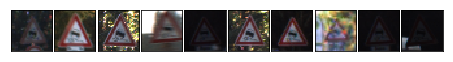

--------------------------------------------------------------------------------------

Class 24: Road narrows on the right                           270 samples


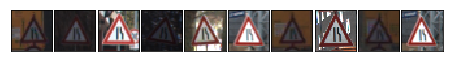

--------------------------------------------------------------------------------------

Class 25: Road work                                           1500 samples


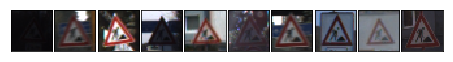

--------------------------------------------------------------------------------------

Class 26: Traffic signals                                     600 samples


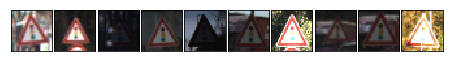

--------------------------------------------------------------------------------------

Class 27: Pedestrians                                         240 samples


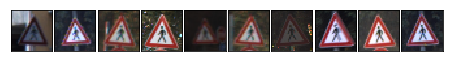

--------------------------------------------------------------------------------------

Class 28: Children crossing                                   540 samples


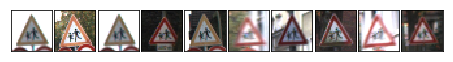

--------------------------------------------------------------------------------------

Class 29: Bicycles crossing                                   270 samples


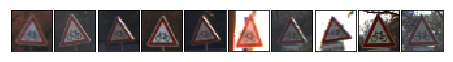

--------------------------------------------------------------------------------------

Class 30: Beware of ice/snow                                  450 samples


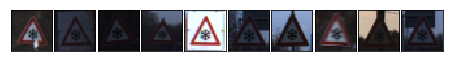

--------------------------------------------------------------------------------------

Class 31: Wild animals crossing                               780 samples


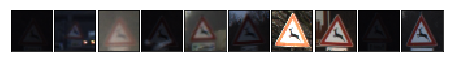

--------------------------------------------------------------------------------------

Class 32: End of all speed and passing limits                 240 samples


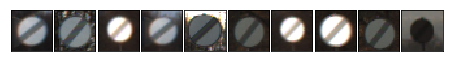

--------------------------------------------------------------------------------------

Class 33: Turn right ahead                                    689 samples


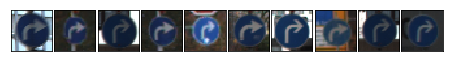

--------------------------------------------------------------------------------------

Class 34: Turn left ahead                                     420 samples


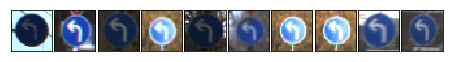

--------------------------------------------------------------------------------------

Class 35: Ahead only                                          1200 samples


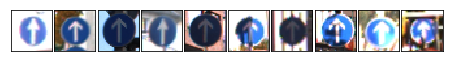

--------------------------------------------------------------------------------------

Class 36: Go straight or right                                390 samples


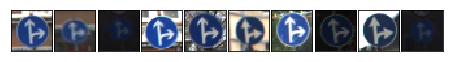

--------------------------------------------------------------------------------------

Class 37: Go straight or left                                 210 samples


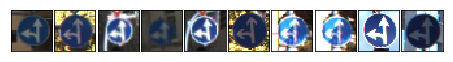

--------------------------------------------------------------------------------------

Class 38: Keep right                                          2070 samples


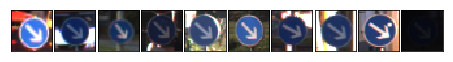

--------------------------------------------------------------------------------------

Class 39: Keep left                                           300 samples


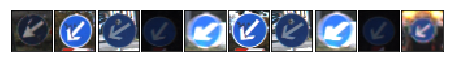

--------------------------------------------------------------------------------------

Class 40: Roundabout mandatory                                360 samples


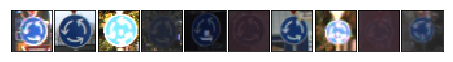

--------------------------------------------------------------------------------------

Class 41: End of no passing                                   240 samples


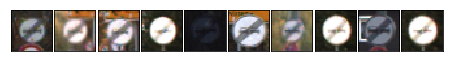

--------------------------------------------------------------------------------------

Class 42: End of no passing by vechiles over 3.5 metric tons  240 samples


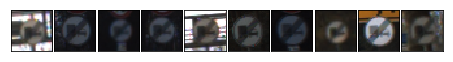

--------------------------------------------------------------------------------------



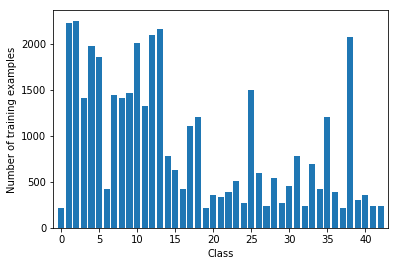

In [10]:
import random

col_width = max(len(name) for name in signnames)

for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("Class %i: %-*s  %s samples" % (c, col_width, signnames[c], str(c_count)))
    fig = pyplot.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    pyplot.show()
    print("--------------------------------------------------------------------------------------\n")
    
pyplot.bar( np.arange( 43 ), class_counts, align='center' )
pyplot.xlabel('Class')
pyplot.ylabel('Number of training examples')
pyplot.xlim([-1, 43])
pyplot.show()

Some classes are highly underrepresented. Overall amount of data is disappointing: some classes have as little as 210 samples, this won't be enough for most of the models to generalise well.    

Images with some signs are horizontally and/or vertically symmetrical (like **Bumpy road** or **Ahead only**), and can be simply flipped, thus allowing us to get twice as much data for these classes.    

Other signs come in kind of interchageable pairs, like **Keep right** and **Keep left**: those signs can be flipped and assigned to a paired class. In some cases (**Keep right** and **Keep left**) we increase the number of samples for **Keep lef**t from 300 to 2370!    

CNNs have built-in invariance to small translations, scaling and rotations. The training set doesn't seem to contain those deformations, so we will add those in our data augmentation step as well.

## Data processing

The usual preprocessing in this case would include scaling of pixel values to [0, 1] (as currently they are in [0, 255] range), representing labels in a one-hot encoding and shuffling. Looking at the images, histogram equalization may be helpful as well. We will apply localized histogram equalization, as it seems to improve feature extraction even further in our case.  

I will __only use a single channel in my mode__, e.g. grayscale images instead of color ones. As Pierre Sermanet and Yann LeCun mentioned in their [paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf), using color channels didn’t seem to improve things a lot, so I will only take `Y` channel of the `YCbCr` representation of an image.



Some useful logging routines.


In [5]:
import sys
import time

def get_time_hhmmss(start = None):
    """
    Calculates time since `start` and formats as a string.
    """
    if start is None:
        return time.strftime("%Y/%m/%d %H:%M:%S")
    end = time.time()
    m, s = divmod(end - start, 60)
    h, m = divmod(m, 60)
    time_str = "%02d:%02d:%02d" % (h, m, s)
    return time_str   

# Print iterations progress
def print_progress(iteration, total):
    """
    Call in a loop to create terminal progress bar
    
    Parameters
    ----------
        
    iteration : 
                Current iteration (Int)
    total     : 
                Total iterations (Int)
    """
    str_format = "{0:.0f}"
    percents = str_format.format(100 * (iteration / float(total)))
    filled_length = int(round(100 * iteration / float(total)))
    bar = '█' * filled_length + '-' * (100 - filled_length)

    sys.stdout.write('\r |%s| %s%%' % (bar, percents)),

    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()


Preprocessing routines.

In [6]:
from sklearn.utils import shuffle
from skimage import exposure
import warnings 

num_classes = 43

def preprocess_dataset(X, y = None):
    """
    Performs feature scaling, one-hot encoding of labels and shuffles the data if labels are provided.
    Assumes original dataset is sorted by labels.
    
    Parameters
    ----------
    X                : ndarray
                       Dataset array containing feature examples.
    y                : ndarray, optional, defaults to `None`
                       Dataset labels in index form.
    Returns
    -------
    A tuple of X and y.    
    """
    print("Preprocessing dataset with {} examples:".format(X.shape[0]))

    #Convert to grayscale, e.g. single channel Y
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)
        
    for i in range(X.shape[0]):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            X[i] = exposure.equalize_adapthist(X[i])
        print_progress(i + 1, X.shape[0])
        
    if y is not None:  
        # Convert to one-hot encoding. Convert back with `y = y.nonzero()[1]`
        y = np.eye(num_classes)[y]
        X, y = shuffle(X, y)

    # Add a single grayscale channel
    X = X.reshape(X.shape + (1,)) 
    return X, y

def class_name(one_hot):
    return signnames[one_hot.nonzero()[0][0]]

def load_and_process_data(pickled_data_file):
    """
    Loads pickled data and preprocesses images and labels by scaling features, 
    shuffling the data and applying one-hot encoding to labels.
    
    Parameters
    ----------
    pickled_data_file  : string
                         Pickled data file name.
    Returns
    -------
    A tuple of X and y containing preloaded and preprocessed features and labels respectively.    
    """
    X, y = load_pickled_data(pickled_data_file, columns = ['features', 'labels'])
    X, y = preprocess_dataset(X, y)
    return (X, y)


In [120]:
a = X_train[:3]

In [121]:
a2 = preprocess_dataset(a)

/Users/zouxiaxia/miniconda3/envs/CS231/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [107]:
print(a2[0].shape)
print(a.shape)

(3, 32, 32, 1)
(3, 32, 32, 3)


## Data Augmentation
The amount of data we have is not sufficient for a model to generalise well. It is also fairly unbalanced, and some classes are represented to significantly lower extent than the others. But we will fix this with data augmentation!  


### Rotation and projection


After experimenting with adding random rotation, projection, blur, noize and gamma adjusting, I have used rotation and projection transformations in the pipeline. Projection transform seems to also take care of random shearing and scaling as we randomly position image corners in a `[±delta, ±delta]` range.   

Please note that we use `edge` mode when applying our transformations, to ensure that we don’t have black box around warped image. Let’s check out what the images look like when we apply random augmentation with intensity = `0.75`.

In [13]:
from nolearn.lasagne import BatchIterator
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform
import random

class AugmentedSignsBatchIterator(BatchIterator):
    """
    Iterates over dataset in batches. 
    Allows images augmentation by randomly rotating, applying projection, 
    adjusting gamma, blurring, adding noize and flipping horizontally.
    """
        
    def __init__(self, batch_size, shuffle = False, seed = 42, p = 0.5, intensity = 0.5):
        """
        Initialises an instance with usual iterating settings, as well as data augmentation coverage
        and augmentation intensity.
        
        Parameters
        ----------
        batch_size:
                    Size of the iteration batch.
        shuffle   :
                    Flag indicating if we need to shuffle the data.
        seed      :
                    Random seed.
        p         :
                    Probability of augmenting a single example, should be in a range of [0, 1] .
                    Defines data augmentation coverage.
        intensity :
                    Augmentation intensity, should be in a [0, 1] range.
        
        Returns
        -------
        New batch iterator instance.
        """
        super(AugmentedSignsBatchIterator, self).__init__(batch_size, shuffle, seed)
        self.p = p
        self.intensity = intensity

    def transform(self, Xb, yb):
        """
        Applies a pipeline of randomised transformations for data augmentation.
        """
        Xb, yb = super(AugmentedSignsBatchIterator, self).transform(
            Xb if yb is None else Xb.copy(), 
            yb
        )
        
        if yb is not None:
            batch_size = Xb.shape[0]
            image_size = Xb.shape[1]
            
            Xb = self.rotate(Xb, batch_size)
            Xb = self.apply_projection_transform(Xb, batch_size, image_size)

        return Xb, yb
        
    def rotate(self, Xb, batch_size):
        """
        Applies random rotation in a defined degrees range to a random subset of images. 
        Range itself is subject to scaling depending on augmentation intensity.
        """
        for i in np.random.choice(batch_size, int(batch_size * self.p), replace = False):
            delta = 30. * self.intensity # scale by self.intensity
            Xb[i] = rotate(Xb[i], random.uniform(-delta, delta), mode = 'edge')
        return Xb   
    
    def apply_projection_transform(self, Xb, batch_size, image_size):
        """
        Applies projection transform to a random subset of images. Projection margins are randomised in a range
        depending on the size of the image. Range itself is subject to scaling depending on augmentation intensity.
        """
        d = image_size * 0.3 * self.intensity
        for i in np.random.choice(batch_size, int(batch_size * self.p), replace = False):        
            tl_top = random.uniform(-d, d)     # Top left corner, top margin
            tl_left = random.uniform(-d, d)    # Top left corner, left margin
            bl_bottom = random.uniform(-d, d)  # Bottom left corner, bottom margin
            bl_left = random.uniform(-d, d)    # Bottom left corner, left margin
            tr_top = random.uniform(-d, d)     # Top right corner, top margin
            tr_right = random.uniform(-d, d)   # Top right corner, right margin
            br_bottom = random.uniform(-d, d)  # Bottom right corner, bottom margin
            br_right = random.uniform(-d, d)   # Bottom right corner, right margin

            transform = ProjectiveTransform()
            transform.estimate(np.array((
                    (tl_left, tl_top),
                    (bl_left, image_size - bl_bottom),
                    (image_size - br_right, image_size - br_bottom),
                    (image_size - tr_right, tr_top)
                )), np.array((
                    (0, 0),
                    (0, image_size),
                    (image_size, image_size),
                    (image_size, 0)
                )))
            Xb[i] = warp(Xb[i], transform, output_shape=(image_size, image_size), order = 1, mode = 'edge')

        return Xb


/Users/zouxiaxia/miniconda3/envs/CS231/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Let's test data augmentation by plotting first 5 examples next to the original images (original image is on the left).

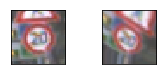

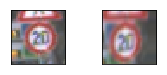

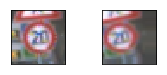

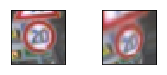

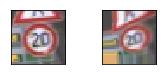

In [14]:
X_train, y_train = load_pickled_data("traffic-signs-data/train.p", columns = ['features', 'labels'])
X_train = X_train / 255.

batch_iterator = AugmentedSignsBatchIterator(batch_size = 5, p = 1.0, intensity = 0.75)
for x_batch, y_batch in batch_iterator(X_train, y_train):
    for i in range(5): 
        # plot two images:
        fig = pyplot.figure(figsize=(3, 1))
        axis = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
        axis.imshow(X_train[i])
        axis = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
        axis.imshow(x_batch[i])
        pyplot.show()
    break

A couple of functions for preprocessing our dataset. We may only need to call them once, then pickle resulting balanced dataset and keep using that pickle from then on.


### Flipping

First, we are going to apply a couple of tricks to extend our data by flipping. You might have noticed that some traffic signs are invariant to horizontal and/or vertical flipping, which basically means that we can flip an image and it should still be classified as belonging to the same class.  

Some signs can be flipped either way — like Priority Road or No Entry signs.  

Other signs are 180° rotation invariant, and to rotate them 180° we will simply first flip them horizontally, and then vertically.  

Finally there are signs that can be flipped, and should then be classified as a sign of some other class. This is still useful, as we can use data of these classes to extend their counterparts.  

We are going to use this during augmentation. Let’s prepare a sign-flipping routine.  


In [15]:
def flip_extend(X, y):
    """
    Extends existing images dataset by flipping images of some classes. As some images would still belong
    to same class after flipping we extend such classes with flipped images. Images of other would toggle 
    between two classes when flipped, so for those we extend existing datasets as well.
    
    Parameters
    ----------
    X       : ndarray
              Dataset array containing feature examples.
    y       : ndarray, optional, defaults to `None`
              Dataset labels in index form.

    Returns
    -------
    A tuple of X and y.    
    """
    # Classes of signs that, when flipped horizontally, should still be classified as the same class
    self_flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
    # Classes of signs that, when flipped vertically, should still be classified as the same class
    self_flippable_vertically = np.array([1, 5, 12, 15, 17])
    # Classes of signs that, when flipped horizontally and then vertically, should still be classified as the same class
    self_flippable_both = np.array([32, 40])
    # Classes of signs that, when flipped horizontally, would still be meaningful, but should be classified as some other class
    cross_flippable = np.array([
        [19, 20], 
        [33, 34], 
        [36, 37], 
        [38, 39],
        [20, 19], 
        [34, 33], 
        [37, 36], 
        [39, 38],   
    ])
    num_classes = 43
    
    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype = X.dtype)
    y_extended = np.empty([0], dtype = y.dtype)
    
    for c in range(num_classes):
        # First copy existing data for this class
        X_extended = np.append(X_extended, X[y == c], axis = 0)
        # If we can flip images of this class horizontally and they would still belong to said class...
        if c in self_flippable_horizontally:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X[y == c][:, :, ::-1, :], axis = 0)
        # If we can flip images of this class horizontally and they would belong to other class...
        if c in cross_flippable[:, 0]:
            # ...Copy flipped images of that other class to the extended array.
            flip_class = cross_flippable[cross_flippable[:, 0] == c][0][1]
            X_extended = np.append(X_extended, X[y == flip_class][:, :, ::-1, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        # If we can flip images of this class vertically and they would still belong to said class...
        if c in self_flippable_vertically:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, :, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        # If we can flip images of this class horizontally AND vertically and they would still belong to said class...
        if c in self_flippable_both:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, ::-1, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
    
    return (X_extended, y_extended)

This simple trick lets us extend original 39,209 training examples to 63,538, nice! And it cost us nothing in terms of data collection or computational resources.

In [16]:
def extend_balancing_classes(X, y, aug_intensity = 0.5, counts = None):
    """
    Extends dataset by duplicating existing images while applying data augmentation pipeline.
    Number of generated examples for each class may be provided in `counts`.
    
    Parameters
    ----------
    X             : ndarray
                    Dataset array containing feature examples.
    y             : ndarray, optional, defaults to `None`
                    Dataset labels in index form.
    aug_intensity :
                    Intensity of augmentation, must be in [0, 1] range.
    counts        :
                    Number of elements for each class.
                    
    Returns
    -------
    A tuple of X and y.    
    """
    num_classes = 43

    _, class_counts = np.unique(y, return_counts = True)
    max_c = max(class_counts)
    total = max_c * num_classes if counts is None else np.sum(counts)
    
    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype = np.float32)
    y_extended = np.empty([0], dtype = y.dtype)
    print("Extending dataset using augmented data (intensity = {}):".format(aug_intensity))
    
    for c, c_count in zip(range(num_classes), class_counts):
        # How many examples should there be eventually for this class:
        max_c = max_c if counts is None else counts[c]
        # First copy existing data for this class
        X_source = (X[y == c] / 255.).astype(np.float32)
        y_source = y[y == c]
        X_extended = np.append(X_extended, X_source, axis = 0)
        for i in range((max_c // c_count) - 1):
            batch_iterator = AugmentedSignsBatchIterator(batch_size = X_source.shape[0], p = 1.0, intensity = aug_intensity)
            for x_batch, _ in batch_iterator(X_source, y_source):
                X_extended = np.append(X_extended, x_batch, axis = 0)
                print_progress(X_extended.shape[0], total)
        batch_iterator = AugmentedSignsBatchIterator(batch_size = max_c % c_count, p = 1.0, intensity = aug_intensity)
        for x_batch, _ in batch_iterator(X_source, y_source):
            X_extended = np.append(X_extended, x_batch, axis = 0)
            print_progress(X_extended.shape[0], total)
            break
        # Fill labels for added images set to current class.
        added = X_extended.shape[0] - y_extended.shape[0]
        y_extended = np.append(y_extended, np.full((added), c, dtype = int))
        
    return ((X_extended * 255.).astype(np.uint8), y_extended)

### Pepare data set
Here we preprocess the whole dataset first. We first flip some of the images which classes allow that, and then prepare two versions of the training dataset: ~~extended~~ and balanced.   
Extended one has the same distribution of examples across classes, but has 20x more augmented data.      
**Balanced contains examples equally balanced across classes**. In both cases we don't simply copy the images — we apply augmentation, so that every time we duplicate the data it's slightly different.  

In [20]:
import random
import pickle
from sklearn.cross_validation import train_test_split

train_dataset_file = "traffic-signs-data/train.p"
test_dataset_file = "traffic-signs-data/test.p"
train_extended_dataset_file = "traffic-signs-data/train_extended.p"
train_balanced_dataset_file = "traffic-signs-data/train_balanced.p"

X_train, y_train = load_pickled_data(train_dataset_file, ['features', 'labels'])
print("Number of training examples in initial dataset =", X_train.shape[0])
_, class_counts = np.unique(y_train, return_counts = True)
X_train, y_train = flip_extend(X_train, y_train)
print("Number of training examples after horizontal flipping =", X_train.shape[0])

# Prepare a dataset with balanced classes
X_train_balanced, y_train_balanced = extend_balancing_classes(X_train, y_train, aug_intensity = 0.75, counts = np.full(43, 10000, dtype = int))
print("Number of training examples after augmenting and balancing training data =", X_train_balanced.shape[0])
pickle.dump({
        "features" : X_train_balanced,
        "labels" : y_train_balanced
    }, open(train_balanced_dataset_file, "wb" ) )
print("Balanced dataset saved in", train_balanced_dataset_file)

# # Prepare a dataset with extended classes
# X_train_extended, y_train_extended = extend_balancing_classes(X_train, y_train, aug_intensity = 0.75, counts = class_counts * 20)
# print("Number of training examples after augmenting and extending training data =", X_train_extended.shape[0])
# pickle.dump({
#         "features" : X_train_extended,
#         "labels" : y_train_extended
#     }, open(train_extended_dataset_file, "wb" ) )
# print("Extended dataset saved in", train_extended_dataset_file)

Number of training examples in initial dataset = 39209
Number of training examples after horizontal flipping = 67378
Extending dataset using augmented data (intensity = 0.75):
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100%
Number of training examples after augmenting and balancing training data = 430000
Balanced dataset saved in traffic-signs-data/train_balanced.p


Preprocess all datasets:

In [8]:
import pickle

train_extended_dataset_file = "traffic-signs-data/train_extended.p"
train_balanced_dataset_file = "traffic-signs-data/train_balanced.p"
train_extended_preprocessed_dataset_file = "traffic-signs-data/train_extended_preprocessed.p"
train_balanced_preprocessed_dataset_file = "traffic-signs-data/train_balanced_preprocessed.p"

test_dataset_file = "traffic-signs-data/test.p"
test_preprocessed_dataset_file = "traffic-signs-data/test_preprocessed.p"

X_train, y_train = load_and_process_data(train_balanced_dataset_file)
pickle.dump({
        "features" : X_train,
        "labels" : y_train
    }, open(train_balanced_preprocessed_dataset_file, "wb" ) )
print("Preprocessed balanced training dataset saved in", train_balanced_preprocessed_dataset_file)

# X_train, y_train = load_and_process_data(train_extended_dataset_file)
# pickle.dump({
#         "features" : X_train,
#         "labels" : y_train
#     }, open(train_extended_preprocessed_dataset_file, "wb" ) )
# print("Preprocessed extended training dataset saved in", train_extended_preprocessed_dataset_file)

X_test, y_test = load_and_process_data(test_dataset_file)
pickle.dump({
        "features" : X_test,
        "labels" : y_test
    }, open(test_preprocessed_dataset_file, "wb" ) )
# print("Preprocessed extended testing dataset saved in", test_preprocessed_dataset_file)
print("Preprocessed balanced testing dataset saved in", test_preprocessed_dataset_file)

Preprocessing dataset with 430000 examples:
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100%
Preprocessed balanced training dataset saved in traffic-signs-data/train_balanced_preprocessed.p
Preprocessing dataset with 12630 examples:
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100%
Preprocessed balanced testing dataset saved in traffic-signs-data/test_preprocessed.p


In [3]:
# Notify when finished    
from IPython.display import Audio
sound_file = 'finish.mp3'
Audio(url=sound_file, autoplay=False)
# Audio(url=sound_file, autoplay=True)


# Model 
## Model architecture
I used a fairly simple model of 3 convolutional layers and 1 fully connected layer (with every convolutional and fully connected layer being followed by a ReLU non-linearity):
![Model architecture](model_architecture.png)
As per Pierre Sermanet paper, I have provided output of every convolutional layer to the classifier, applying additional pooling to each of the convolutinal outputs, so that they are proportionally downsampled.

In [7]:
from keras.models import Sequential
from keras.layers import Input,Dense,Activation,Flatten,Merge,Concatenate,merge
from keras.layers import Conv2D,MaxPooling2D,Lambda,Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping,CSVLogger,ModelCheckpoint
from keras.models import Model
from keras.models import load_model
from keras import regularizers

Using TensorFlow backend.


In [35]:
X_train.shape

(39209, 32, 32, 3)

In [6]:
def model(inputs_shape=None, activation='relu', optimizer = 'adam', loss='categorical_crossentropy'):
    
    image_input = Input(shape = inputs_shape[1:])
    x = Lambda(lambda x: x/255.0,input_shape = X_train.shape[1:])(image_input)

    x = Conv2D(32,(5,5),padding='same')(x)
    x = BatchNormalization(axis=3)(x)
    x = Dropout(0.1)(x)
    x = Activation(activation)(x)
    x = MaxPooling2D((2,2))(x)
    
    # part1 for merge
    part1 = MaxPooling2D((4,4))(x)
    part1 = Flatten()(part1)
    
    # continue forward propagation
    x = Conv2D(64,(5,5),padding='same')(x)
    x = BatchNormalization(axis=3)(x)
    x = Dropout(0.2)(x)
    x = Activation(activation)(x)
    x = MaxPooling2D((2,2))(x)
    
    # part2 for merge
    part2 = MaxPooling2D((2,2))(x)
    part2 = Flatten()(part2)
     
    # continue forward propagation
    x = Conv2D(128,(5,5),padding='same')(x)
    x = BatchNormalization(axis=3)(x)
    x = Dropout(0.3)(x)
    x = Activation(activation)(x)
    x = MaxPooling2D((2,2))(x)

    # part3 for merge
    part3 = Flatten()(x)
    
    merged_x = merge([part1,part2,part3], mode='concat')
#     merged_x = Concatenate([part1,part2,part3])
    print(type(merged_x))
    print(type(part3))
    merged_x = Dense(1024, kernel_regularizer=regularizers.l2(0.0001))(merged_x)
    merged_x = BatchNormalization(axis=1)(merged_x)
    merged_x = Dropout(0.5)(merged_x)
    merged_x = Activation(activation)(merged_x)

    out = Dense(43, activation='softmax')(merged_x)
    
    model = Model(inputs=image_input, outputs=out)
    model.compile(optimizer=optimizer, loss =loss, metrics=['accuracy'])

    return model



## Training

In [88]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

from keras.utils.np_utils import to_categorical

y_train_label = to_categorical(y_train, num_classes=43)
y_test_label = to_categorical(y_test, num_classes=43)


In [75]:
model1 = model(inputs_shape=(X_train.shape), activation='relu', optimizer = 'adam', loss='categorical_crossentropy')

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>


/Users/zouxiaxia/miniconda3/envs/CS231/lib/python3.5/site-packages/ipykernel_launcher.py:37: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/Users/zouxiaxia/miniconda3/envs/CS231/lib/python3.5/site-packages/keras/legacy/layers.py:458: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


In [85]:
from keras.callbacks import EarlyStopping,CSVLogger,ModelCheckpoint

filepath="gridsearch_{val_loss:.3f}.h5"
callbacks = [EarlyStopping(monitor='val_loss',patience=6),
             ModelCheckpoint(filepath, monitor='val_loss',save_best_only=True)]    

model1.fit(X_train, y_train_label,epochs=1000,batch_size=128,validation_split=0.05 ,callbacks=callbacks,shuffle="batch")
scores = model1.evaluate(X_test, y_test_label, verbose=0)

Train on 37248 samples, validate on 1961 samples
Epoch 1/30
  256/37248 [..............................] - ETA: 441s - loss: 7.1278 - acc: 0.0469

KeyboardInterrupt: 

In [90]:
model = load_model('gridsearch_0.216.h5')
# print("Test Accuracy: %.2f%%" % (model.evaluate(X_test, y_test)[1]*100))
model.evaluate(X_test, y_test_label, verbose=0)

/Users/zouxiaxia/miniconda3/envs/CS231/lib/python3.5/site-packages/keras/engine/topology.py:1252: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


[0.49172161326744401, 0.90142517811895262]

直接训练，第5-6个epoch，test set得到90.14%的准确率；  
train set准确率在99%， validadtion set准确率在98%。

Use `balanced dataset`

In [4]:
import pickle


test_preprocessed_dataset_file = "traffic-signs-data/test_preprocessed.p"
train_balanced_preprocessed_dataset_file = "traffic-signs-data/train_balanced_preprocessed.p"

X_train, y_train = load_pickled_data(train_balanced_preprocessed_dataset_file, ['features', 'labels'])
# X_test, y_test = load_pickled_data(test_preprocessed_dataset_file, ['features', 'labels'])


In [5]:
X_train.shape

(430000, 32, 32, 1)

In [8]:
model2 = model(inputs_shape=(X_train.shape), activation='relu', optimizer = 'adam', loss='categorical_crossentropy')

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>


/Users/zouxiaxia/miniconda3/envs/CS231/lib/python3.5/site-packages/ipykernel_launcher.py:37: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/Users/zouxiaxia/miniconda3/envs/CS231/lib/python3.5/site-packages/keras/legacy/layers.py:458: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


In [10]:
from keras.callbacks import EarlyStopping,CSVLogger,ModelCheckpoint

filepath="model2_balanced_data_{val_loss:.3f}.h5"
callbacks = [EarlyStopping(monitor='val_loss',patience=10),
             ModelCheckpoint(filepath, monitor='val_loss',save_best_only=True)]    

model2.fit(X_train, y_train, epochs=1001,batch_size=256,validation_split=0.05 ,callbacks=callbacks,shuffle="batch")



Train on 408500 samples, validate on 21500 samples
Epoch 1/1001
408500/408500 [==============================] - 3845s - loss: 0.7063 - acc: 0.8391 - val_loss: 15.6897 - val_acc: 0.0231
Epoch 2/1001
408500/408500 [==============================] - 3767s - loss: 0.3061 - acc: 0.9537 - val_loss: 15.8846 - val_acc: 0.0246
Epoch 3/1001
408500/408500 [==============================] - 3737s - loss: 0.2720 - acc: 0.9651 - val_loss: 15.6708 - val_acc: 0.0234
Epoch 4/1001
408500/408500 [==============================] - 3742s - loss: 0.2622 - acc: 0.9699 - val_loss: 15.2124 - val_acc: 0.0254
Epoch 5/1001
408500/408500 [==============================] - 3762s - loss: 0.2506 - acc: 0.9735 - val_loss: 15.8154 - val_acc: 0.0213
Epoch 6/1001
408500/408500 [==============================] - 3763s - loss: 0.2413 - acc: 0.9758 - val_loss: 15.9322 - val_acc: 0.0217
Epoch 7/1001
408500/408500 [==============================] - 3754s - loss: 0.2314 - acc: 0.9777 - val_loss: 14.3967 - val_acc: 0.0249
Epoc

KeyboardInterrupt: 

In [ ]:
scores = model2.evaluate(X_test, y_test, verbose=0)